# **E-COMMERCE CUSTOMER CHURN**

### *By Leonard Tanubrata*

---

<img src="Customer_Churn_Prediction_Models_in_Machine_Learning copy.png" alt="alt text">


---

## **Context**
Shopify adalah suatu perusahaan e-commerce yang menjual berbagai macam produk di website dan aplikasinya. Manajemen eksekutif Shopify ingin mengidentifikasi pelanggan yang hilang atau pelanggan yang tidak berlangganan kembali di platform mereka, Pelanggan yang hilang dapat disebut customer churn. Perusahan e-commerce perlu melakukan evaluasi pelanggan untuk mengetahui customer churn pada perusahaan.

---
## **Problem Statement**
Perusahaan ingin mengetahui customer churn atau pelanggan yang tidak menggunakan jasa perusahaan lagi, yang dapat menimbulkan kerugian bagi perusahaan. Oleh karena itu, perusahaan ingin mencari cara agar bisa melakukan prediksi terhadap customer yang memiliki pola akan churn dengan efisien dan cepat, agar sebelum costumer benar-benar churn, perusahaan dapat menjangkau customer tersebut dengan memberikan layanan yang lebih baik, seperti memberikan promo yang menarik. Namun, sebaiknya promo diberikan kepada orang yang tepat. Dengan demikian, perusahaan dapat menghindari kerugian yang akan terjadi akibat memberikan promo yang sia-sia kepada orang yang tidak tepat (customer tidak churn).

---
## **Objective**
Berdasarkan permasalahan tersebut, perusahaan ingin memprediksi pelanggan mana yang loyal dan pelanggan mana yang akan churn. Hal ini sejalan untuk meningkatkan potensi keuntungan yang akan diperoleh perusahaan. Karena hal tersebut, pada sesi ini kita akan memprediksi pelanggan yang akan churn dan tidak, dengan menggunakan pendekatan machine learning berdasarkan pola dalam di data yang tersedia.

---
## **Analytic Approach**
- Menemukan pola yang membedakan antara customer yang melakukan churn dan yang tidak melakukan churn dengan cara menganalisis data yang ada pada perusahaan.
- Melakukan prediksi pada customer (churn atau tidak churn) dengan membuat model klasifikasi

---
## **Metrix Evaluation**

![image.png](https://i0.wp.com/varshasaini.in/wp-content/uploads/2022/10/confusion-matrix.png?w=633&ssl=1)

- **True Positive (TP)**: Customer diprediksi churn dan kenyataannya melakukan churn
- **False Positive (FP)**: Customer diprediksi melakukan churn, namun pada kenyataannya customer tidak melakukan churn
- **False Negative (FN)**: Customer diprediksi tidak melakukan churn, namun pada kenyataannya customer melakukan churn
- **True Negative (TN)**: Customer diprediksi tidak churn dan kenyataannya tidak melakukan churn

Dalam melakukan prediksi, kesalahan yang dapat terjadi:

**Type 1 error**: False Positive 
- Action: Memberikan promo dengan perkiraan cost sebesar *$100* per customer per tahun. (perkiraan cost akan di jelaskan di conclusion dibawah)
- Konsekuensi: Memberikan promo pada target yang salah, sehingga perusahaan mengeluarkan biaya yang tidak tepat.

 **Type 2 error**: False Negative
- Action: Tidak memberi perhatian pada customer yang actualnya churn tapi kita prediksi tidak akan melakukan churn.
- Konsekuensi: Perusahaan mengalami kerugian $1000 karena kehilangan customer. (perkiraan rugi akan dijelaskan di conclusion dibawah)

Berdasarkan dari kemungkinan kesalahan prediksi di atas, maka model yang dibuat harus dapat mengurangi atau menekan False Negative, namun tetap menjaga agar perusahaan tidak mengeluarkan biaya yang tidak tepat sasaran dalam memberikan promosi (False Positive). Oleh karena itu, metric utama yang digunakan yakni **`F2 score`**.

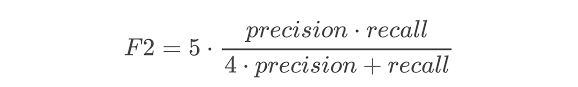

**`F2 score`** adalah salah satu classification evaluation metrics yang mengukur akurasi model dengan mempertimbangkan trade-off antara precision dan recall. F2 score didasarkan pada nilai beta di mana beta lebih besar dari 1 memberikan lebih banyak penekanan pada recall daripada precision.

**`F2 score`** dapat digunakan untuk mengevaluasi performa model klasifikasi di mana kesalahan false negative lebih penting untuk dihindari daripada false positive.

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno

# train test split
from sklearn.model_selection import train_test_split

# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer


# algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Resampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN

# cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_val_score, StratifiedKFold,RandomizedSearchCV

# metrics untuk regresi
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

## **Dataset E-commerce Customer Churn**

Dataset milik Shopify. Shopify ingin mengetahui pelanggan yang akan melakukan churn, sehingga mereka dapat mendekati pelanggan untuk menawarkan beberapa promo.

## **Data Dictionary**
|Feature|Description|
|---|---|
|Tenure|Tenure of a customer in the company|
|WarehouseToHome|Distance between the warehouse to the customer’s home|
|NumberOfDeviceRegistered|Total number of deceives is registered on a particular customer|
|PreferedOrderCat|Preferred order category of a customer in the last month|
|SatisfactionScore|Satisfactory score of a customer on service|
|MaritalStatus|Marital status of a customer|
|NumberOfAddress|Total number of added on a particular customer|
|Complaint|Any complaint has been raised in the last month|
|DaySinceLastOrder|Day since last order by customer|
|CashbackAmount|Average cashback in last month|
|Churn|Churn flag|


In [64]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


**Exploring Dataset**

Mengetahui jumlah data dan type dataset

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


**Check Missing Value dalam dataset**



In [66]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

- Terdapat 194 missing value pada column 'Tenure'
- Terdapat 169 missing value pada column 'WarehouseToHome'
- Terdapat 213 missing value pada column 'DaySinceLastOrder'

**Melihat Data Duplikat**

In [67]:
df.duplicated().sum()

671


Data Duplikat sebanyak 671

**Mengetahui ringkasan deskriptive statistics pada kolom numerikal dan kolom kategorikal**

In [68]:
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


Kategori yang paling banyak disukai oleh pelanggan adalah kategori **Laptop & Accessory**. Kemudian dapat terlihat bahwa pelanggan yang paling banyak yaitu pelanggan yang **sudah menikah**.

**Melihat unique value dalam masing-masing column**

In [69]:
for i in df.describe(include='all').columns:
    print(i, '\n', df[i].unique(), '\n')

Tenure 
 [15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60.
 50.] 

WarehouseToHome 
 [ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.] 

NumberOfDeviceRegistered 
 [4 3 6 2 5 1] 

PreferedOrderCat 
 ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery'] 

SatisfactionScore 
 [3 1 4 2 5] 

MaritalStatus 
 ['Single' 'Married' 'Divorced'] 

NumberOfAddress 
 [ 2  5  7  8  3  1  9  4 10 11  6 19 22 21] 

Complain 
 [0 1] 

DaySinceLastOrder 
 [ 7. nan  8. 11.  2.  1.  4.  3.  6.  0. 14.  9. 10. 12.  5. 17. 30. 18.
 16. 13. 15. 46. 31.] 

CashbackAmount 
 [143.32 129.29 168.54 ... 147.66 231.86 153.73] 

Churn 
 [0 1] 



menyatukan kategori Mobile Phone dengan Mobile karena dinilai kategori yang sama

In [70]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

In [71]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Fashion', 'Others',
       'Grocery'], dtype=object)

Sekarang hanya ada 5 kategori di **PreferedOrderCat** yang tadinya 6 kategori

**Menghapus Data Duplikat**

In [72]:
df.drop_duplicates(subset=None, keep='first',inplace=True)
df.shape

(3269, 11)

Setelah Duplikat Dihapus Data awal 3941 menjadi 3269

**Memperdalam pengecekan missing value**

,Columns,% Missing Value
8,DaySinceLastOrder,0.055369
0,Tenure,0.048639
1,WarehouseToHome,0.041297
2,NumberOfDeviceRegistered,0.000000
3,PreferedOrderCat,0.000000
4,SatisfactionScore,0.000000
5,MaritalStatus,0.000000
6,NumberOfAddress,0.000000
7,Complain,0.000000
9,CashbackAmount,0.000000


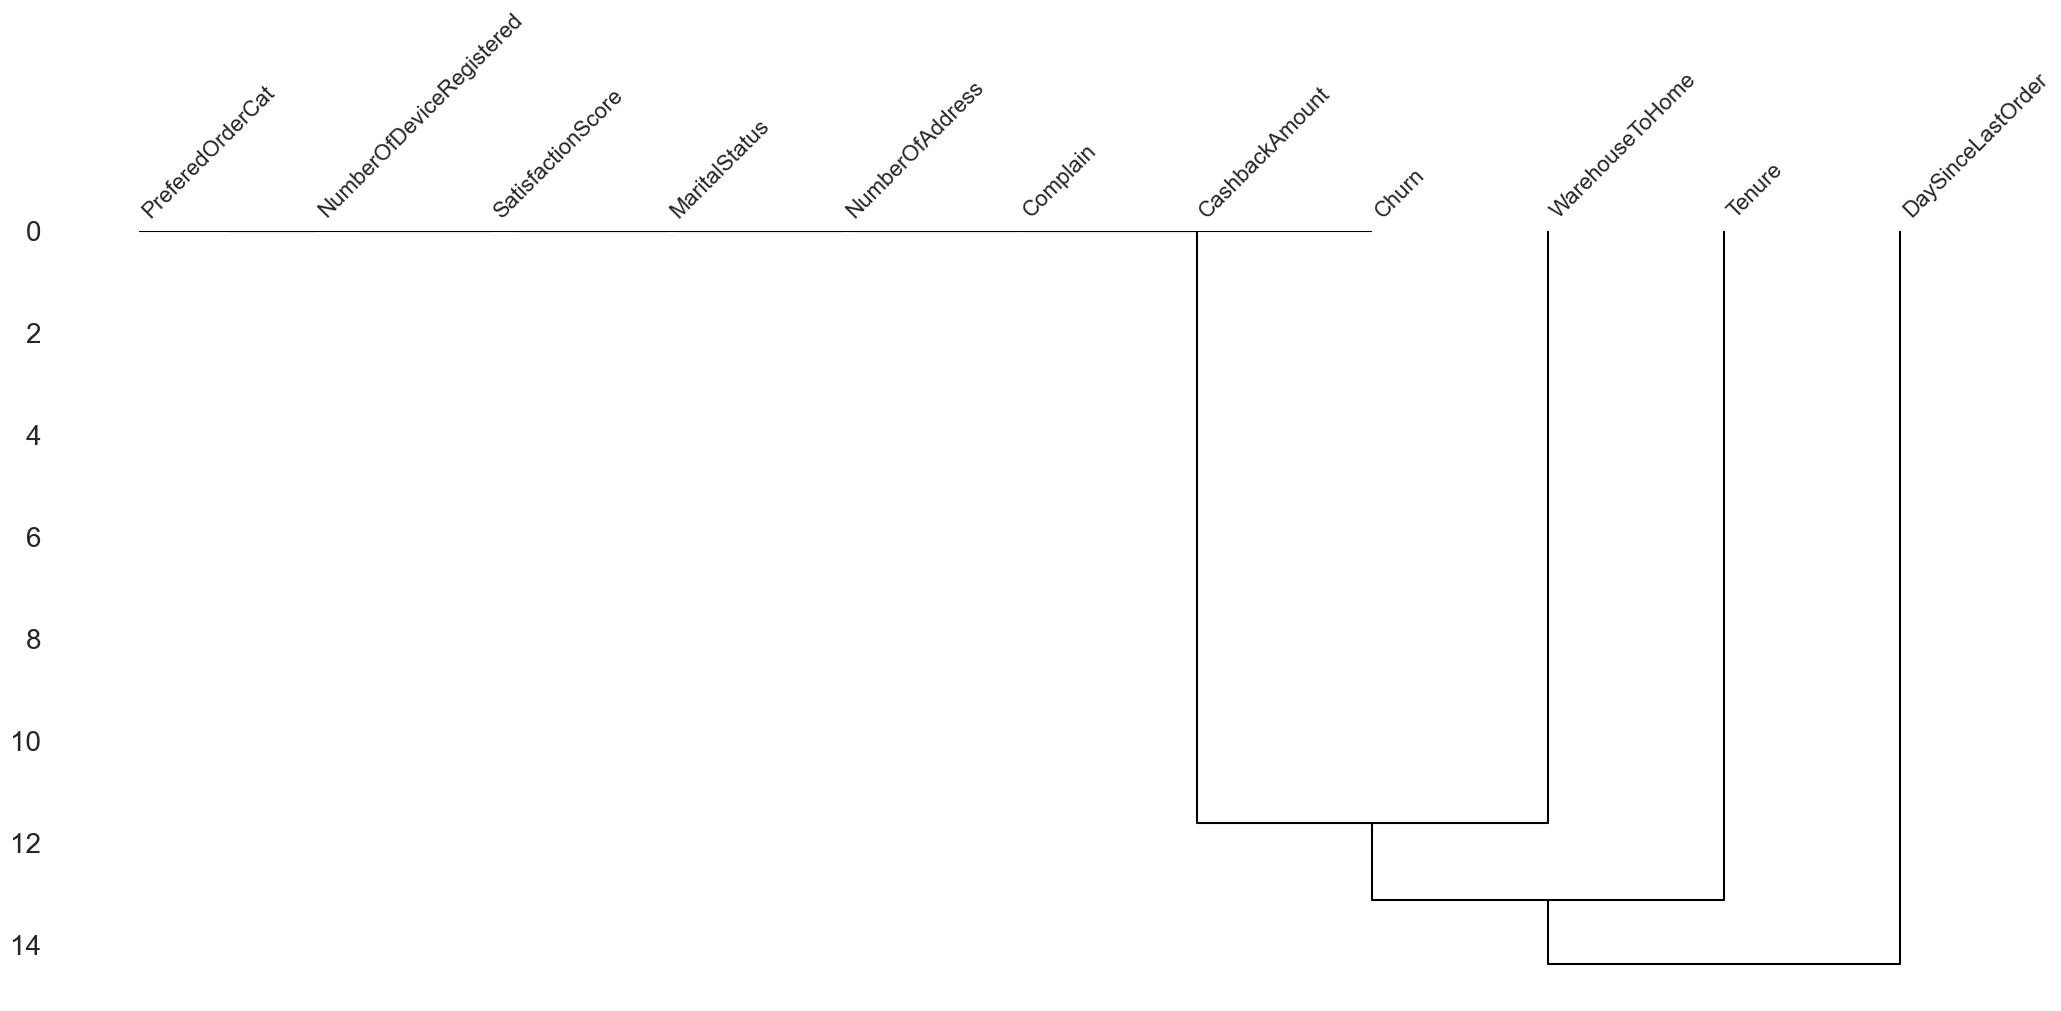

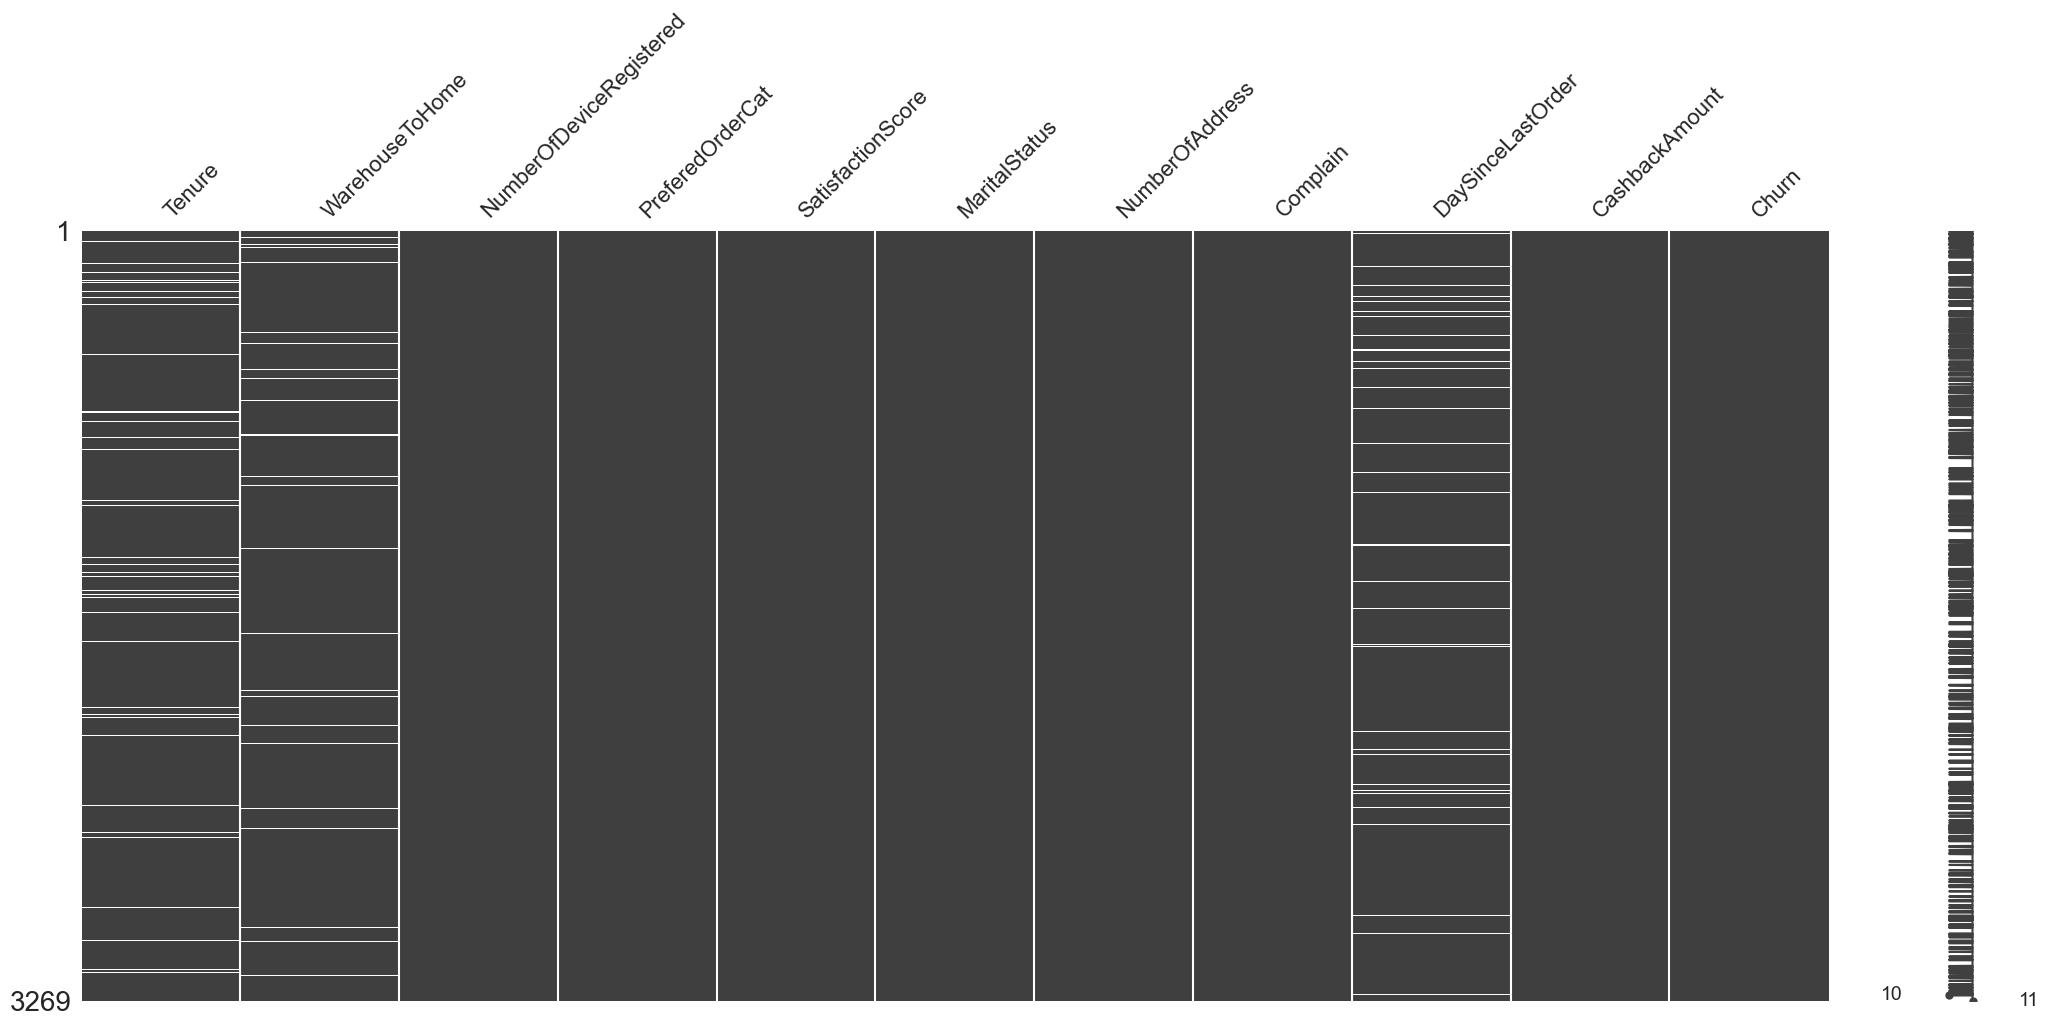

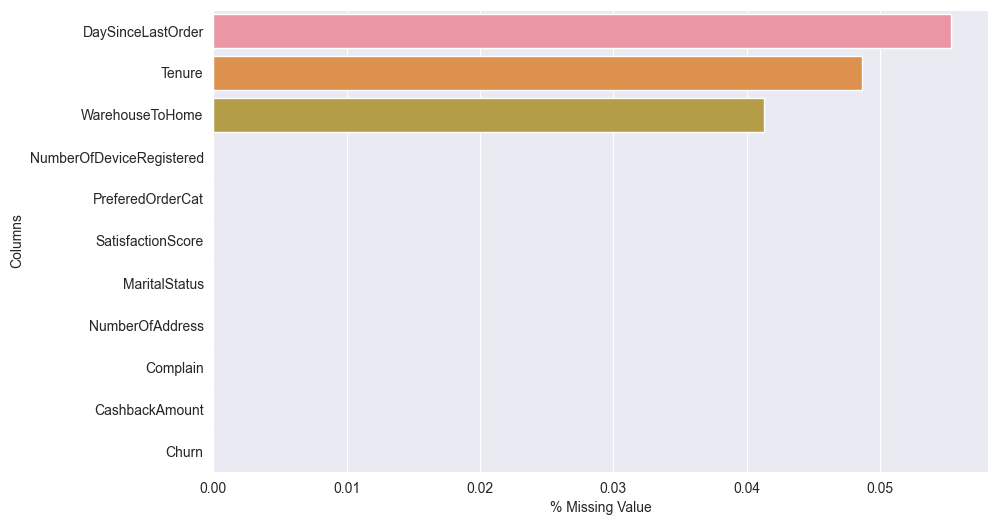

In [73]:
miss = pd.DataFrame(df.isnull().sum()/df.shape[0])\
                                .reset_index()\
                                .rename(columns={0:'% Missing Value',
                                                 'index':'Columns'})\
                                .sort_values('% Missing Value', ascending=False)

display(miss)

msno.dendrogram(df)
plt.show()

msno.matrix(df)
plt.show()

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(data=miss, y='Columns', x='% Missing Value')
plt.show()

- Dari data tersebut, dapat kita lihat bahwa persentase tertinggi data yang hilang adalah fitur **DaySinceLastOrder** yaitu sekitar 5.4%. Dari plot di atas juga dapat kita asumsikan bahwa data yang hilang merupakan kejadian random.


- Missing value pada data hanya terdapat pada data yang memiliki kategori numerik, untuk missing value handling akan dibandingkan menggunakan SimpleImputer dan KnnImputer. Data yang paling mendekati dari central tendency yang akan digunakan (Mean dan Median).

**cek target apakah imbalance apa tidak**

Churn
0    0.836953
1    0.163047
Name: count, dtype: float64

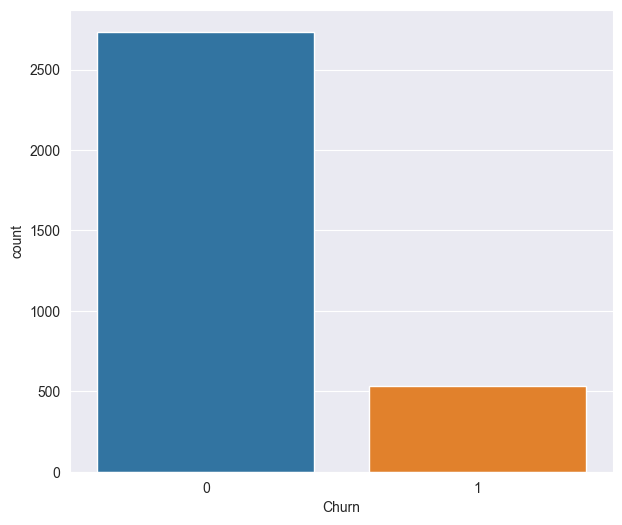

In [74]:
display(df['Churn'].value_counts()/df.shape[0])

plt.figure(figsize=(7,6))
sns.countplot(data=df, x='Churn')
plt.show()

Dari hasil plot, dapat diketahui bahwa data label terindikasi imbalanced dengan persentase : 
- 83% untuk yang tidak churn
- 17% untuk yang churn

ini termasuk kedalam **Moderate Imbalance** menurut https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

<Axes: title={'center': 'CashbackAmount'}, xlabel='CashbackAmount', ylabel='Count'>

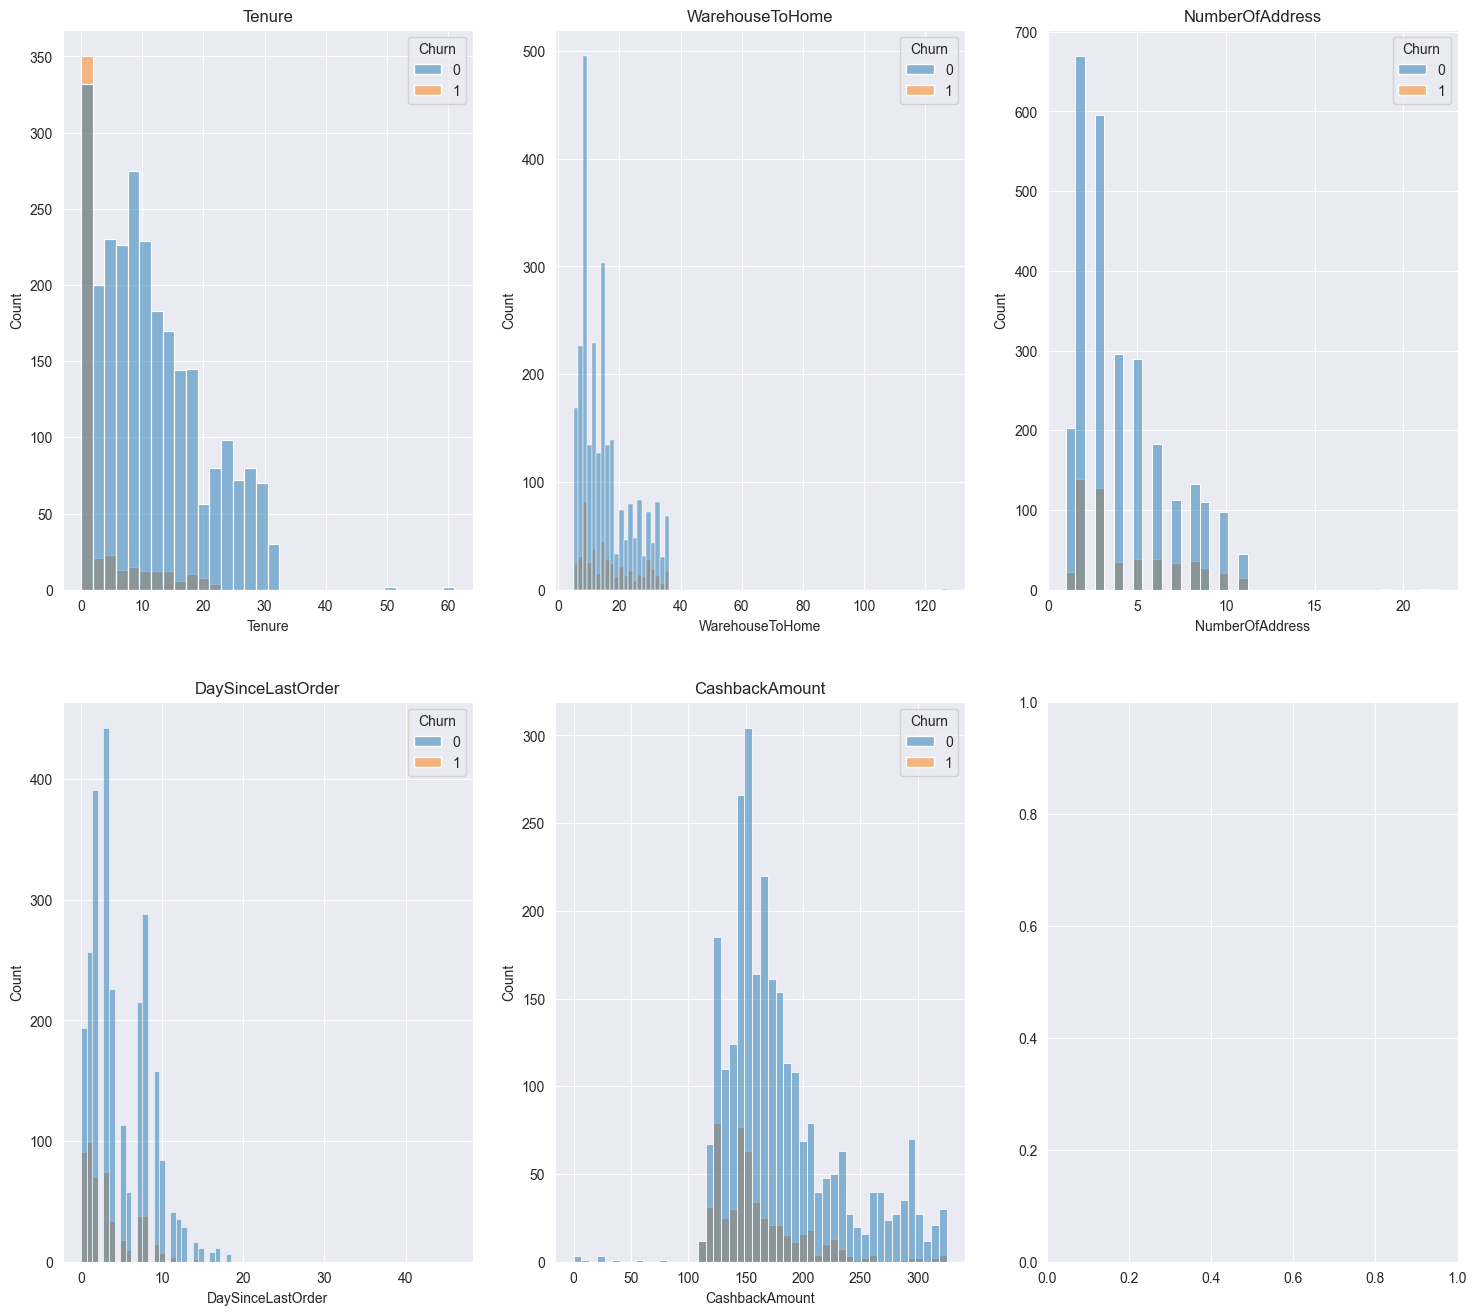

In [75]:
figure, axes = plt.subplots(2, 3,  figsize=(18,16))
axes[0,0].set_title('Tenure')
sns.histplot(data=df,x='Tenure',hue='Churn',ax=axes[0,0])
axes[0,1].set_title('WarehouseToHome')
sns.histplot(data=df,x='WarehouseToHome',hue='Churn',ax=axes[0,1])
axes[0,2].set_title('NumberOfAddress')
sns.histplot(data=df,x='NumberOfAddress',hue='Churn',ax=axes[0,2])
axes[1,0].set_title('DaySinceLastOrder')
sns.histplot(data=df,x='DaySinceLastOrder',hue='Churn',ax=axes[1,0])
axes[1,1].set_title('CashbackAmount')
sns.histplot(data=df,x='CashbackAmount',hue='Churn',ax=axes[1,1])


1. Fitur-fitur yang memiliki distribusi right skewed adalah sebagai berikut.
- Tenure
- WarehouseToHome
- NumberOfAddress
- DaySinceLastOrder
- CashbackAmount

Text(0.5, 1.0, 'CashbackAmount')

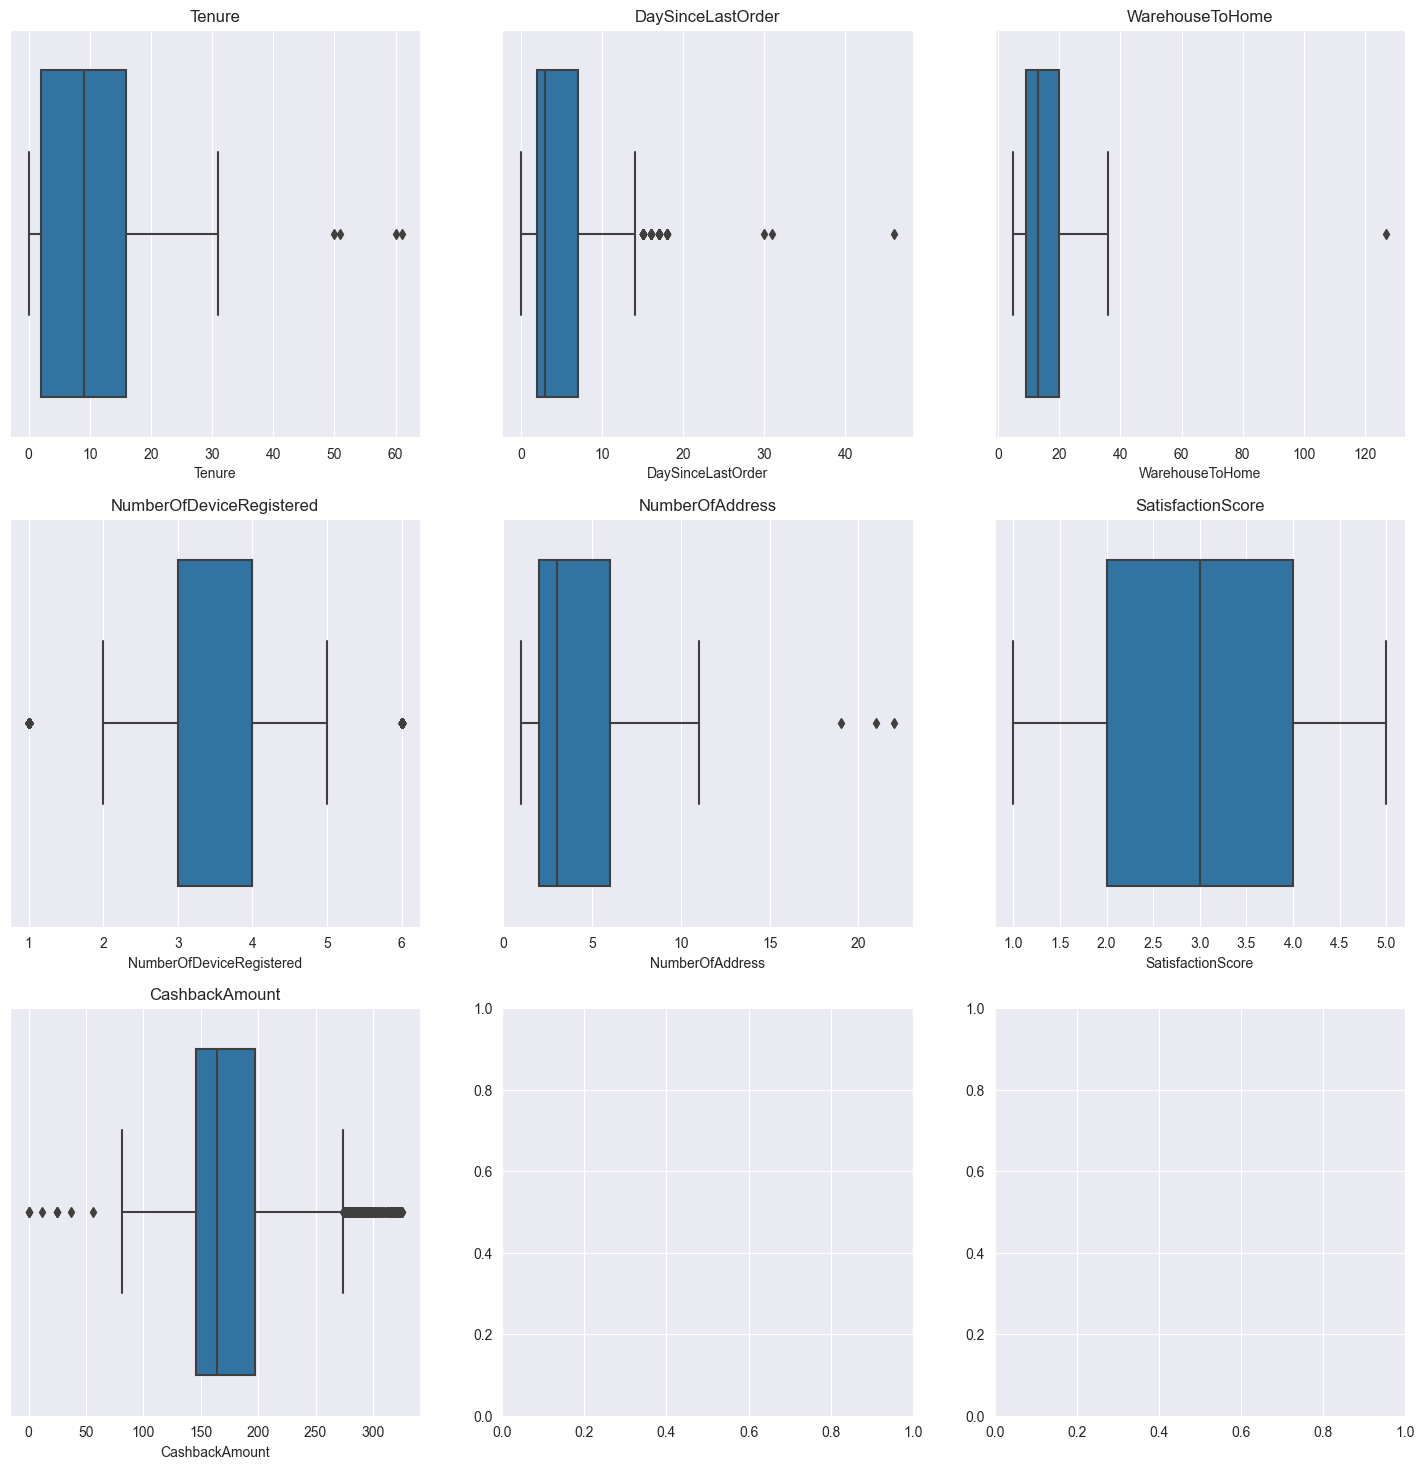

In [76]:
figure, axes = plt.subplots(3, 3,  figsize=(18,18))
sns.boxplot(data=df, x='Tenure', hue='Churn',ax=axes[0,0])
axes[0,0].set_title('Tenure')
sns.boxplot(data=df, x='DaySinceLastOrder', hue='Churn',ax=axes[0,1])
axes[0,1].set_title('DaySinceLastOrder')
sns.boxplot(data=df, x='WarehouseToHome', hue='Churn',ax=axes[0,2])
axes[0,2].set_title('WarehouseToHome')
sns.boxplot(data=df, x='NumberOfDeviceRegistered', hue='Churn',ax=axes[1,0])
axes[1,0].set_title('NumberOfDeviceRegistered')
sns.boxplot(data=df, x='NumberOfAddress', hue='Churn',ax=axes[1,1])
axes[1,1].set_title('NumberOfAddress')
sns.boxplot(data=df, x='SatisfactionScore', hue='Churn',ax=axes[1,2])
axes[1,2].set_title('SatisfactionScore')
sns.boxplot(data=df, x='CashbackAmount', hue='Churn',ax=axes[2,0])
axes[2,0].set_title('CashbackAmount')

2. Outlier terdapat pada kolom adalah sebagai berikut.
- Tenure
- WarehouseToHome
- NumberOfDeviceRegistered
- NumberOfAddress
- DaySinceLastOrder
- CashbackAmount

Text(0.5, 1.0, 'Complain')

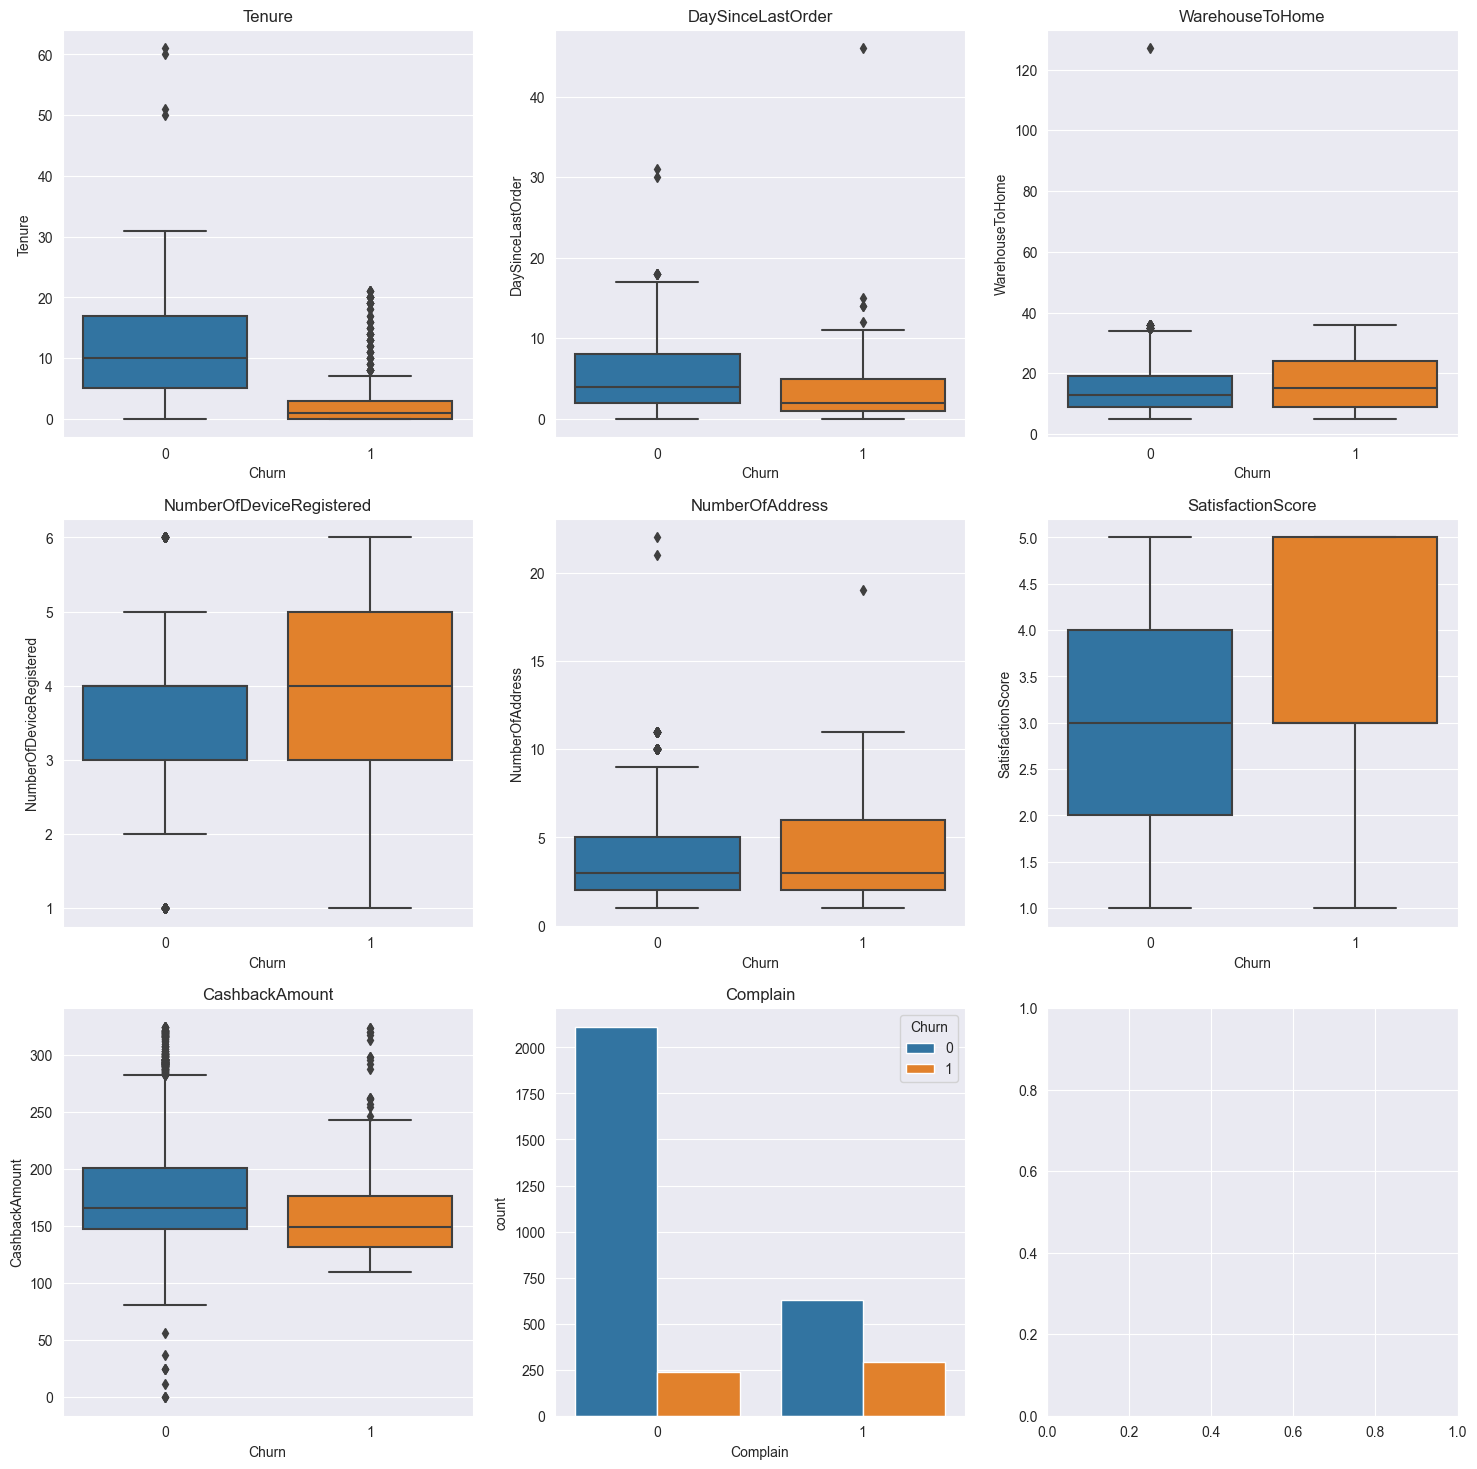

In [80]:
figure, axes = plt.subplots(3, 3,  figsize=(18,18))
sns.boxplot(data=df, y='Tenure', x='Churn',ax=axes[0,0])
axes[0,0].set_title('Tenure')
sns.boxplot(data=df, y='DaySinceLastOrder', x='Churn',ax=axes[0,1])
axes[0,1].set_title('DaySinceLastOrder')
sns.boxplot(data=df, y='WarehouseToHome', x='Churn',ax=axes[0,2])
axes[0,2].set_title('WarehouseToHome')
sns.boxplot(data=df, y='NumberOfDeviceRegistered', x='Churn',ax=axes[1,0])
axes[1,0].set_title('NumberOfDeviceRegistered')
sns.boxplot(data=df, y='NumberOfAddress', x='Churn',ax=axes[1,1])
axes[1,1].set_title('NumberOfAddress')
sns.boxplot(data=df, y='SatisfactionScore', x='Churn',ax=axes[1,2])
axes[1,2].set_title('SatisfactionScore')
sns.boxplot(data=df, y='CashbackAmount', x='Churn',ax=axes[2,0])
axes[2,0].set_title('CashbackAmount')
sns.countplot(data=df,x='Complain',hue='Churn',ax=axes[2,1])
axes[2,1].set_title('Complain')

Dilihat dari barplot diatas bisa di ambil bahwa :
- Customer yang churn adalah customer yang lebih banyak tidak memberikan complain dalam sebulan terakhir.
- Customer yang churn rata-rata memiliki Tenure yang rendah.
- Customer churn rata-rata memberikan satisfaction score yang tinggi tapi dia tetap churn.
- Customer yang mendapat casback yang besar rata-rata juga akan churn.

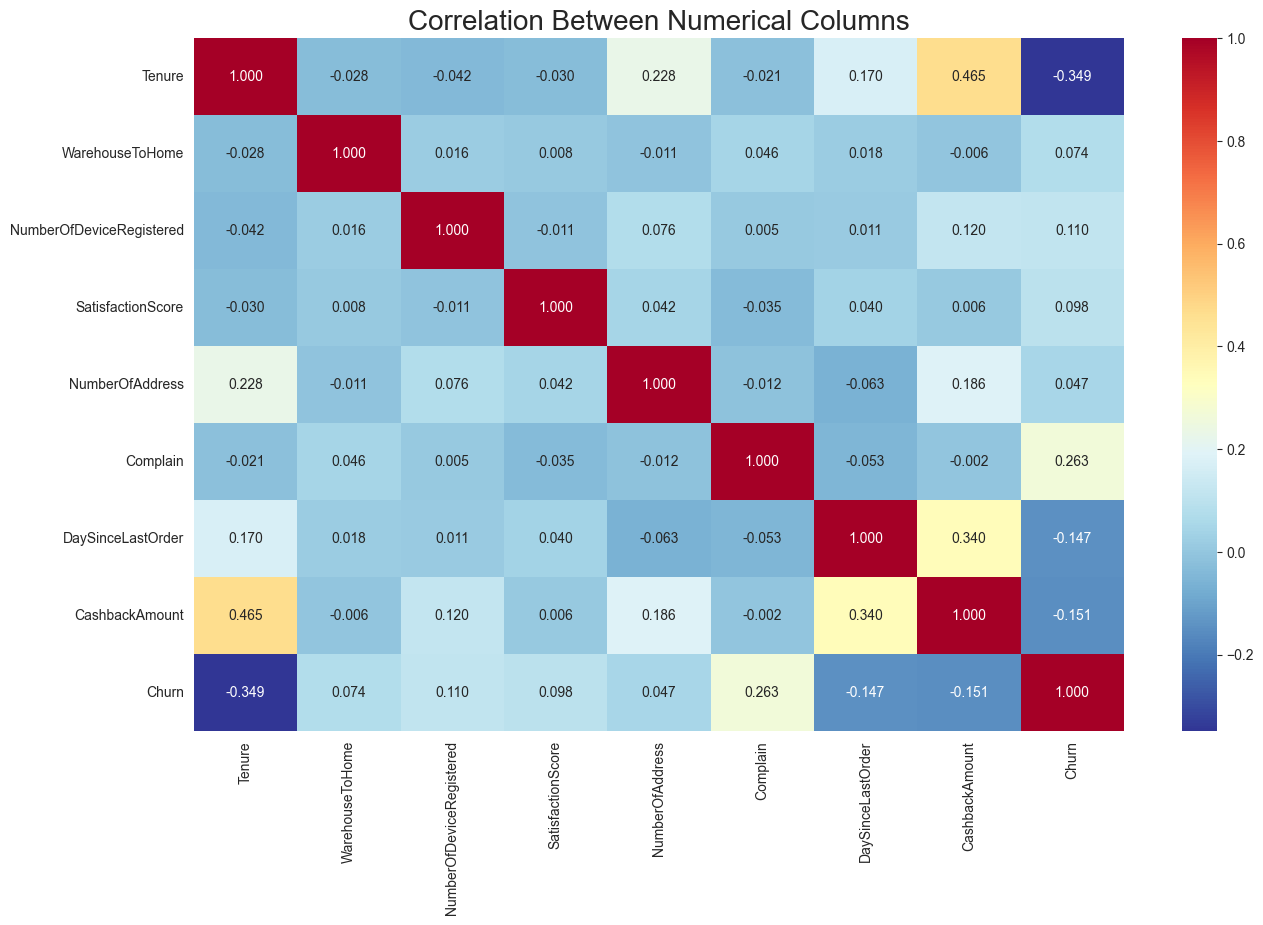

In [81]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_feature = df.select_dtypes(include=numerics)
plt.figure(figsize=(15,9))
sns.heatmap(data=num_feature.corr(method='pearson'), annot=True, fmt='.3f', cmap='RdYlBu_r')
plt.title('Correlation Between Numerical Columns', fontsize=20)
plt.show()

- Korelasi yang tinggi pada target adalah fitur **Tenure**,**Complain**
- Korelasi yang paling rendah pada target adalah fitur **NumberOfAddress**,**SatisfactionScore**

---

## **Data Splitting**

Define X dan y

In [82]:
# features
X = df.drop(columns=['Churn'])

# target
y = df['Churn']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# data train = 70%
# data test = 30%

## **Data Preprocessing**

Langkah-langkah dalam proses preprocessing yaitu dengan **impute missing values** (mengisi data yang kosong), **scaling** (melakukan transformasi terhadap data numerik agar antar variabel memiliki skala yang sama), **encoding** (mengubah data kategorikal menjadi data numerikal) yaitu:

**Impute Missing Values**

Menggunakan Simple Imputer dengan nilai Median: 'Tenure', 'WarehouseToHome', 'DaySinceLastOrder'

Pada tahap explore data di atas, diketahui bahwa pada feature 'Tenure', 'WarehouseToHome' dan 'DaySinceLastOrder' terdapat missing values dan datanya tidak berdistribusi normal, sehingga imputasi dilakukan menggunakan nilai Median. Kolom tersebut juga tergolong numerical features yang tidak memiliki hubungan antar features lainnya, terbukti dari nilai corr < 0.5, sehingga imputasi dilakukan menggunakan metode Simple Imputer, dan tidak memanfaatkan feature lainnya untuk memprediksi missing values.

**Scaling**

Menggunakan Robust Scaler: 'Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount'

Numerical features di atas memiliki data outliers sehingga dapat menggunakan Robust Scaler yang bisa menghandle data outliers. Feature 'Complain' memiliki data 0 dan 1, sehingga tidak perlu dilakukan scaling lagi.

**Encoding**

Menggunakan One Hot Encoder: 'PreferedOrderCat', 'MaritalStatus'

Pada tahap explore data di atas, diketahui bahwa data pada feature 'PreferedOrderCat' dan 'MaritalStatus' merupakan data kategorikal, sehingga perlu dilakukan encoding untuk mengubah data menjadi numerikal. Encoding dilakukan menggunakan metode One Hot Encoder karena categorical features tersebut tidak memiliki tingkatan/urutan/tidak ordinal dan memiliki unique data yang sedikit. Feature 'PreferedOrderCat' memiliki 5 unique data, dan feature 'MaritalStatus' memiliki 3 unique data.

In [84]:
pipe_impute_robust = Pipeline([
    ('median', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

In [85]:
transformer = ColumnTransformer([
    ('pipe_impute_robust', pipe_impute_robust, ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']),
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_impute_robust',
                                 Pipeline(steps=[('median',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

---

## Benchmark Model

In [86]:
# Algoritma Machine Learning
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced') 
rf = RandomForestClassifier(random_state=0, class_weight='balanced')
cat = CatBoostClassifier(random_state=0, verbose=False) 
ada = AdaBoostClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

In [87]:
# resampler
smote = SMOTE(random_state=0)
smoten = SMOTEENN(random_state=0)
nearmiss = NearMiss()
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

In [88]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer, fbeta_score
f2_score = make_scorer(fbeta_score, beta=2)

list_model = [logreg, knn, tree, rf, xgbc, cat, gbc,ada]

resample = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near': nearmiss,
    'smoteenn' : smoten
}

metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1',
           'f2': f2_score}

   
test_accuracy_arr = []    
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
test_f2_arr = []


for key,val in resample.items():
    for i in list_model:
        crossval = StratifiedKFold(n_splits=5)

        if val == None:
            estimator = Pipeline([
                ('transorm', transformer),
                ('model', i),
            ])
        else:
            estimator = Pipeline([
                ('transorm', transformer),
                ('resample', val),
                ('model', i),
            ])

        scores = cross_validate(estimator, X_train, y_train,cv=crossval, scoring=metrics)
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean())
        test_precision_arr.append(scores['test_precision'].mean())
        test_recall_arr.append(scores['test_recall'].mean())
        test_f1_arr.append(scores['test_f1'].mean())
        test_f2_arr.append(scores['test_f2'].mean())

list_algo = []
list_resample = []


for key in resample.keys():
    for mod in ['logreg', 'knn', 'tree', 'rf', 'xgbc', 'cat', 'gbc','ada']:
        list_algo.append(mod)
        list_resample.append(key)

model_bench = pd.DataFrame({
    'model': list_algo,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f1': test_f1_arr,
    'f2': test_f2_arr
})


In [89]:
model_bench.sort_values('f2',ascending=False).head()

,model,resample,accuracy,precision,recall,f1,f2
19,rf,rus,0.848609,0.510700,0.858054,0.639835,0.754818
20,xgbc,rus,0.845271,0.493141,0.863387,0.627603,0.750520
21,cat,rus,0.846092,0.522318,0.842054,0.644649,0.750134
13,cat,ros,0.849056,0.705748,0.761297,0.731490,0.748820
14,gbc,ros,0.837689,0.553498,0.804360,0.654241,0.736141


Dikarenakan Dataset mengalami imbalance maka testing algoritma menggunakan resampling untuk menangani imbalance di ternyata di dapatkan menggunakan `RandomUnderSampling` mendapatkan hasil F2 score terbaik.

### **RandomUnderSampling**

 `RandomUnderSampling` adalah pendekatan yang digunakan untuk mengurangi jumlah sampel dari kelas mayoritas (kelas dengan jumlah sampel lebih banyak) sehingga sejajar dengan jumlah sampel dari kelas minoritas (kelas dengan jumlah sampel lebih sedikit). Pendekatan ini dilakukan dengan menghapus secara acak beberapa sampel dari kelas mayoritas sampai jumlah sampelnya setara dengan jumlah sampel dari kelas minoritas.

Berdasarkan DataFrame diatas, diketahui bahwa dari delapan algoritma yang dilooping, algoritma `Random Forest` , `XGBoost` , `CatBoost` adalah 3 algoritma terbaik. Selanjutnya saya akan membandingkan 3 algoritma teratas tersebut dengan mempredict test set dan dilihat mana yang lebih stabil.

In [90]:
score_accuracy = []
score_precision = []
score_recall = []
score_f1 = []
score_fb = []
list_algo = ['RandomForest','CatBoost','XGBoost']
list_resample = []

list_model = [rf,cat,xgbc]
fb_score = make_scorer(fbeta_score, beta = 2)

for i in list_model:
    model = Pipeline([
        ('transform', transformer),
        ('resampling', rus),
        ('model', i)
    ])
    

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_accuracy.append(accuracy_score(y_test, y_pred))
    score_precision.append(precision_score(y_test, y_pred))
    score_recall.append(recall_score(y_test, y_pred))
    score_f1.append(f1_score(y_test, y_pred))
    score_fb.append(fbeta_score(y_test, y_pred, beta = 2))
    list_resample.append('rus')



score_before_tuning = pd.DataFrame({'model': list_algo,
                                    'resample':list_resample,                                
                                    'Accuracy': score_accuracy, 
                                    'Precision': score_precision, 
                                    'Recall': score_recall, 
                                    'F1 Score': score_f1, 
                                    'F2 Score': score_fb}, 
                                    )
score_before_tuning.sort_values('F2 Score',ascending=False)

,model,resample,Accuracy,Precision,Recall,F1 Score,F2 Score
1,CatBoost,rus,0.860347,0.543396,0.9,0.677647,0.795580
0,RandomForest,rus,0.854230,0.531365,0.9,0.668213,0.790340
2,XGBoost,rus,0.841998,0.508834,0.9,0.650113,0.780065


Dilihat dari dataframe diatas ternyata `CatBoost` dan `RandomForest` yang memiliki hasil f2 score lebih baik untuk memprediksi test set.
Jadi saya akan Hyperparameter Tuning 2 algoritma tersebut untuk mencoba berusaha mengoptimalkan algoritmanya.

---

## **Hyperparameter Tuning**

Hyperparameter tuning dilakukan untuk meningkatkan performa model dengan mencari konfigurasi hyperparameter yang optimal.

Fungsi dari hyperparameter tuning adalah:

- **Meningkatkan performa model** : Dengan menentukan hyperparameter yang optimal, model dapat menjadi lebih akurat dan efisien.

- **Menghindari overfitting dan underfitting** : Dengan menentukan hyperparameter yang tepat, model dapat menghindari overfitting (terlalu cocok dengan data latih) atau underfitting (tidak cocok dengan data latih).

- **Meningkatkan generalisasi** : Dengan menentukan hyperparameter yang optimal, model dapat meningkatkan kemampuan untuk memprediksi data yang tidak terlihat (data uji atau data baru).

- **Menghemat waktu dan biaya** : Dengan menentukan hyperparameter yang optimal, waktu dan biaya yang diperlukan untuk melatih model dapat dikurangi.

Hyperparameter tuning yang akan dilakukan menggunakan `Random Search` dengan cara memilih hyperparameter secara acak dari rentang nilai yang ditentukan, untuk mencari set hyperparameter terbaik untuk model yang digunakan.

---

### CatBoost Classifier

Tuning pertama

In [91]:
# Hyperparam space CatBoost
hyperparam_space_cat = {
    'model__depth': list(np.arange(1,100,2)), 
    'model__learning_rate': list(np.arange(0.01, 1.0, 0.01)),
    'model__iterations': np.arange(100, 1000, 100),
}

In [92]:
# Benchmark model 1
cat = CatBoostClassifier(random_state=0, verbose=False) 

# F2 scoring metric
fb_score = make_scorer(fbeta_score, beta = 2)

# Resample
rus = RandomUnderSampler(random_state=0)

# Create the algorithm chains
pipe_model = Pipeline([
    ('transformer', transformer),
    ('resample',rus),
    ('model', cat)
])

# Hyperparameter tuning RandomSearch
randomsearch_cat = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space_cat,
    cv = 5,
    scoring= fb_score,
    n_jobs= -1,
    verbose = 1,
    n_iter= 100,
    random_state=0 
)

In [93]:
# fitting
randomsearch_cat.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'DaySinceLastOrder',
                                                                                'Cashb...
                                        'model__learning_rate': [0.01, 0.02,
                                                                 0.03, 0.04,
                                                                 0.05,
                                                                 0.060000000000000005,
                                                                 0.06999999999999999,
                                                                 0.08, 0.09,
                                                                 0.09999999999999999,
                                                                 0.11, 0.12,
                                                                 0.13, 0.14,
                                                                 0.15000000000000002,
                                                                 0.16, 0.17,
                                                                 0.18000000000000002,
                                                                 0.19, 0.2,
                                                                 0.21000000000000002,
                                                                 0.22, 0.23,
                                                                 0.24000000000000002,
                                                                 0.25, 0.26,
                                                                 0.27, 0.28,
                                                                 0.29000000000000004,
                                                                 0.3, ...]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2),
                   verbose=1)

In [94]:
print('CatBoost')
print('Best_score:', randomsearch_cat.best_score_)
print('Best_params:', randomsearch_cat.best_params_)

CatBoost
Best_score: 0.7654319107332904
Best_params: {'model__learning_rate': 0.52, 'model__iterations': 600, 'model__depth': 7}


Hasil Tuning pertama

---

Tuning kedua

In [98]:
# Hyperparam space CatBoost
hyperparam_space_cat = {
    'model__depth': list(np.arange(4,10,2)), 
    'model__learning_rate': list(np.arange(0.4, 0.6, 0.1)),
    'model__iterations': np.arange(500, 700, 50),
}

In [99]:
# Benchmark model 1
cat = CatBoostClassifier(random_state=0, verbose=False) 

# F2 scoring metric
fb_score = make_scorer(fbeta_score, beta = 2)

# Resample
rus = RandomUnderSampler(random_state=0)

# Create the algorithm chains
pipe_model = Pipeline([
    ('transformer', transformer),
    ('resample',rus),
    ('model', cat)
])

# Hyperparameter tuning RandomSearch
randomsearch_cat = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space_cat,
    cv = 5,
    scoring= fb_score,
    n_jobs= -1,
    verbose = 1,
    n_iter= 100,
    random_state=0 
)

In [100]:
# fitting
randomsearch_cat.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'DaySinceLastOrder',
                                                                                'Cashb...
                                                                               ['PreferedOrderCat',
                                                                                'MaritalStatus'])])),
                                             ('resample',
                                              RandomUnderSampler(random_state=0)),
                                             ('model',
                                              <catboost.core.CatBoostClassifier object at 0x13565d4d0>)]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__depth': [4, 6, 8],
                                        'model__iterations': array([500, 550, 600, 650]),
                                        'model__learning_rate': [0.4, 0.5]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2),
                   verbose=1)

In [101]:
print('CatBoost Tuning Kedua')
print('Best_score:', randomsearch_cat.best_score_)
print('Best_params:', randomsearch_cat.best_params_)

CatBoost Tuning Kedua
Best_score: 0.7692585256383337
Best_params: {'model__learning_rate': 0.4, 'model__iterations': 600, 'model__depth': 8}


Hasil Tuning Kedua

Algoritma CatBoost dilakukan tuning sebanyak 2 kali. Tuning pertama mendapatkan best F2 score meningkat dari model yang sebelum di tuning. Lalu tuning kedua dilakukan dengan mempersempit range dari parameter yang ada, menyesuaikan dari best params hasil tuning pertama. Best F2 score hasil tuning kedua juga mengalami peningkatan dari model awal sebelum di tuning.

---

### Random Forest Classifier

Tuning pertama

In [102]:
# Hyperparam space Random Forest
hyperparam_space_rf = {
    'model__max_depth': list(np.arange(1,100,2)), 
    'model__n_estimators': list(np.arange(1,100,2)),
    'model__max_features': ['sqrt', 'log2'],
    'model__min_samples_leaf': list(np.arange(1,100,2)),
    'model__min_samples_split': list(np.arange(1,100,2)),
}

In [103]:
# Benchmark model 2
rf = RandomForestClassifier(random_state=0, class_weight='balanced')

# F2 scoring metric
fb_score = make_scorer(fbeta_score, beta = 2)

# Resample
rus = RandomUnderSampler(random_state=0)

# Create the algorithm chains
pipe_model = Pipeline([
    ('transformer', transformer),
    ('resample',rus),
    ('model', rf)
])

# Hyperparameter tuning RandomSearch
randomsearch_rf = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space_rf,
    cv = 5,
    scoring= fb_score,
    n_jobs= -1,
    verbose = 1,
    n_iter= 100,
    random_state=0 
)

In [104]:
randomsearch_rf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'DaySinceLastOrder',
                                                                                'Cashb...
                                                                    27, 29, 31,
                                                                    33, 35, 37,
                                                                    39, 41, 43,
                                                                    45, 47, 49,
                                                                    51, 53, 55,
                                                                    57, 59, ...],
                                        'model__min_samples_split': [1, 3, 5, 7,
                                                                     9, 11, 13,
                                                                     15, 17, 19,
                                                                     21, 23, 25,
                                                                     27, 29, 31,
                                                                     33, 35, 37,
                                                                     39, 41, 43,
                                                                     45, 47, 49,
                                                                     51, 53, 55,
                                                                     57, 59, ...],
                                        'model__n_estimators': [1, 3, 5, 7, 9,
                                                                11, 13, 15, 17,
                                                                19, 21, 23, 25,
                                                                27, 29, 31, 33,
                                                                35, 37, 39, 41,
                                                                43, 45, 47, 49,
                                                                51, 53, 55, 57,
                                                                59, ...]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2),
                   verbose=1)

In [105]:
print('RandomForest')
print('Best_score:', randomsearch_rf.best_score_)
print('Best_params:', randomsearch_rf.best_params_)

RandomForest
Best_score: 0.6994200520605688
Best_params: {'model__n_estimators': 49, 'model__min_samples_split': 95, 'model__min_samples_leaf': 7, 'model__max_features': 'log2', 'model__max_depth': 15}


Hasil Tuning Pertama

---

Tuning Kedua

In [109]:
# Hyperparam space Random Forest
hyperparam_space_rf = {
    'model__max_depth': list(np.arange(15,80,1)), 
    'model__n_estimators': list(np.arange(1,100,1)),
    'model__max_features': ['log2'],
    'model__min_samples_leaf': list(np.arange(1,85,1)),
    'model__min_samples_split': list(np.arange(35,120,1)),
}

In [110]:
# Benchmark model 2
rf = RandomForestClassifier(random_state=0, class_weight='balanced')

# F2 scoring metric
fb_score = make_scorer(fbeta_score, beta = 2)

# Resample
rus = RandomUnderSampler(random_state=0)

# Create the algorithm chains
pipe_model = Pipeline([
    ('transformer', transformer),
    ('resample',rus),
    ('model', rf)
])

# Hyperparameter tuning RandomSearch
randomsearch_rf = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space_rf,
    cv = 5,
    scoring= fb_score,
    n_jobs= -1,
    verbose = 1,
    n_iter= 100,
    random_state=0 
)

In [111]:
randomsearch_rf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'DaySinceLastOrder',
                                                                                'Cashb...
                                                                    15, 16, 17,
                                                                    18, 19, 20,
                                                                    21, 22, 23,
                                                                    24, 25, 26,
                                                                    27, 28, 29,
                                                                    30, ...],
                                        'model__min_samples_split': [35, 36, 37,
                                                                     38, 39, 40,
                                                                     41, 42, 43,
                                                                     44, 45, 46,
                                                                     47, 48, 49,
                                                                     50, 51, 52,
                                                                     53, 54, 55,
                                                                     56, 57, 58,
                                                                     59, 60, 61,
                                                                     62, 63, 64, ...],
                                        'model__n_estimators': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9, 10,
                                                                11, 12, 13, 14,
                                                                15, 16, 17, 18,
                                                                19, 20, 21, 22,
                                                                23, 24, 25, 26,
                                                                27, 28, 29, 30, ...]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2),
                   verbose=1)

In [112]:
print('RandomForest Tuning Kedua')
print('Best_score:', randomsearch_rf.best_score_)
print('Best_params:', randomsearch_rf.best_params_)

RandomForest Tuning Kedua
Best_score: 0.709058284717625
Best_params: {'model__n_estimators': 23, 'model__min_samples_split': 53, 'model__min_samples_leaf': 7, 'model__max_features': 'log2', 'model__max_depth': 69}


Hasil Tuning Kedua

Algoritma RandomForest dilakukan tuning sebanyak 2 kali. Tuning Pertama dan Kedua Tuning tidak mendapatkan hasil yang lebih besar sebelum model di tuning.

---

### Best Model

Perbandingan best score CatBoost dan Random Forest, sebelum dan setelah tuning :

In [113]:
print(model_bench.iloc[21]['f2'], 'CatBoost Benchmark')
print(randomsearch_cat.best_score_, 'CatBoost Tuning')

print(model_bench.iloc[20]['f2'], 'Random Forest Benchmark')
print(randomsearch_rf.best_score_, 'Random Forest Tuning')

0.7501337767813581 CatBoost Benchmark
0.7692585256383337 CatBoost Tuning
0.7505200440554837 Random Forest Benchmark
0.709058284717625 Random Forest Tuning


Berdasarkan dari dua algoritma yang sudah dilakukan tuning, ternyata setelah dilakukan tuning dua kali, algoritma `CatBoost` memiliki best score yang lebih tinggi dibandingkan dengan algoritma `RandomForest`. Oleh karena itu, kita akan lanjut ke proses modeling ke test set dengan menggunakan algoritma `CatBoost`.

Parameter terbaik `CatBoost` dengan tuning kedua :
- model__learning_rate : `0.4`
- model__iterations : `600`
- model__depth : `8`


---

## **Performance in Test Set**

### CatBoost Classifier

`CatBoost` adalah algoritma pembelajaran mesin yang menggunakan gradien boosting dengan decision trees untuk membangun model prediksi yang kuat. CatBoost secara otomatis menangani variabel kategorikal, nilai yang hilang, dan ketidakseimbangan kelas. Algoritma ini melatih sekumpulan pohon secara berulang dengan meminimalkan fungsi kerugian menggunakan gradien descent. 

`CatBoost` menggunakan teknik regularisasi untuk mencegah overfitting dan meningkatkan generalisasi model. Model ini menggabungkan prediksi dari semua pohon dalam ensemble untuk membuat prediksi yang akurat pada data baru. Secara keseluruhan, CatBoost adalah algoritma yang efisien dan efektif untuk tugas klasifikasi, menawarkan fitur seperti penanganan otomatis variabel kategorikal dan performa yang baik pada berbagai jenis dataset.

Berikut adalah cara kerja CatBoost untuk klasifikasi:

1. **Penanganan Variabel Kategorikal** : CatBoost secara otomatis menangani variabel kategorikal, menghilangkan kebutuhan untuk encoding manual. Algoritma ini menggunakan metode yang disebut Ordered Boosting untuk mengonversi fitur kategorikal menjadi nilai numerik dengan efektif.

2. **Pelatihan Awal** : CatBoost dimulai dengan membangun sebuah decision tree awal. Tree ini dapat dibuat menggunakan algoritma seperti CART (Classification and Regression Trees). Tree ini memprediksi nilai awal (misalnya, menggunakan nilai target rata-rata) dan menjadi Tree pertama dalam ensemble.

3. **Gradien Boosting** : CatBoost secara progresif menambahkan lebih banyak decision tree ke dalam ensemble. Pada setiap iterasi, model CatBoost menghitung gradien dari fungsi kerugian berdasarkan prediksi saat ini dan label yang sesuai. Kemudian, model membangun decision tree baru untuk memprediksi kesalahan yang tersisa (gradien negatif). Tree baru tersebut bertujuan untuk memperbaiki kesalahan yang dilakukan oleh Tree sebelumnya dalam ensemble.

4. **Regularisasi** : CatBoost menggunakan berbagai teknik regularisasi untuk mencegah overfitting dan meningkatkan generalisasi model. Algoritma ini menerapkan regularisasi L2 pada fungsi kerugian dan menggunakan strategi untuk menangani nilai yang hilang dan ketidakseimbangan kelas secara internal.

5. **Prediksi** : Setelah pelatihan selesai, model CatBoost dapat digunakan untuk melakukan prediksi pada data baru. Prediksi dibuat dengan menggabungkan prediksi dari semua Tree dalam ensemble dengan bobot yang sesuai.

CatBoost dikenal karena implementasinya yang efisien dan fitur-fitur seperti penanganan otomatis variabel kategorikal, nilai yang hilang, dan ketidakseimbangan kelas. Ini memungkinkan pembuatan model prediksi yang kuat untuk tugas klasifikasi.

Hyperparameter yang dilakukan tuning di atas yaitu:

- `**depth**` : Mengacu pada kedalaman maksimum dari setiap pohon dalam ensemble. Kedalaman pohon menentukan seberapa kompleks model dapat menjadi. Semakin besar nilai depth, model dapat mempelajari hubungan yang lebih kompleks dalam data, tetapi juga meningkatkan risiko overfitting.

- `**learning_rate**` : Mengontrol seberapa cepat model belajar dari kesalahan. Ini adalah tingkat pembelajaran yang mempengaruhi sejauh mana model menyesuaikan prediksi berdasarkan gradien fungsi kerugian. Learning rate yang lebih kecil memungkinkan model untuk belajar secara perlahan, sementara learning rate yang lebih besar dapat menyebabkan model mengubah prediksi dengan cepat.

- `**iterations**` : Menentukan jumlah iterasi atau langkah yang akan dilakukan oleh algoritme gradien boosting. Setiap iterasi, model CatBoost menambahkan pohon baru ke dalam ensemble untuk memperbaiki prediksi kesalahan sebelumnya. Jumlah iterations harus dipilih dengan hati-hati karena dapat mempengaruhi waktu pelatihan dan kompleksitas model. Jika iterations terlalu kecil, model mungkin tidak memiliki cukup waktu untuk mempelajari pola yang rumit dalam data. Namun, jika iterations terlalu besar, waktu pelatihan dapat meningkat secara signifikan tanpa adanya peningkatan yang signifikan dalam performa model.

### Before Hyperparameter Tuning

In [114]:
model= CatBoostClassifier(random_state=0, verbose=False)

model_pipe = Pipeline([
    ('transformer', transformer),
    ('resampler', rus),
    ('model', model)
])

# fitting
model_pipe.fit(X_train, y_train)

# predict
y_pred = model_pipe.predict(X_test)

# f2 score score
f2score_cat_benchmark = fbeta_score(y_test, y_pred, beta=2)
f2score_cat_benchmark

0.7955801104972375

### After Hyperparameter Tuning

In [115]:
# best model
cat_tuning = randomsearch_cat.best_estimator_

# fitting
cat_tuning.fit(X_train, y_train)

# predict
y_pred_cat_tuning = cat_tuning.predict(X_test)

# f2 score
f2score_cat_tuning = fbeta_score(y_test, y_pred_cat_tuning, beta=2)
f2score_cat_tuning

0.7926829268292681

In [116]:
print(f2score_cat_benchmark, 'CatBoost Benchmark')
print(f2score_cat_tuning, 'CatBoost Tuning')

0.7955801104972375 CatBoost Benchmark
0.7926829268292681 CatBoost Tuning


---

### **Confusion Matrix**

Text(0.5, 1.0, 'CatBoost after tuning')

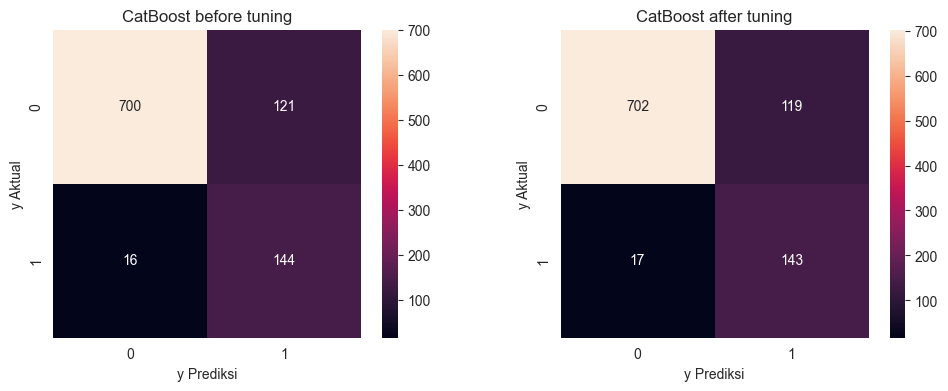

In [117]:
plt.figure(figsize=(12,4))

# Model XGBoost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('CatBoost before tuning')

# Model XGBoost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_cat_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('CatBoost after tuning')

Dilihat dari confusion matrix diatas ternyata kita akan memilih untuk memakai CatBoost setelah di tuning dikarenakan `False Negative` setelah tuning hanya beda 1 poin dari sebelum tuning tetapi menaikkan True Positive dan menurunkan False Positive.

---

## **Summary**

Berdasarkan modeling menggunakan algoritma CatBoost:

- Train Set:
   - Before tuning: `0.75`
   - After tuning: `0.76`

- Test Set:
   - Before tuning: `0.7955`
   - After tuning: `0.7926`


Hyperparameter tuning berhasil meningkatkan `F2 Score` pada train set dari model dengan CatBoost sebesar `0.01`. 
lalu Performa model sebelum tuning mendapat hasil prediksi sebesar `0.7955` hampir setara dengan model setelah tuning yaitu `0.7926`.

---

## **Feature Importance**

In [118]:
cat = CatBoostClassifier(random_state=0, verbose=False)

model = Pipeline([
    ('transform', transformer),
    ('resample',rus),
    ('model', cat)
])
    

model.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_impute_robust',
                                                  Pipeline(steps=[('median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('resample', RandomUnderSampler(random_state=0)),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x135ed9510>)])

In [119]:
col_feature = [col.split('__')[1] for col in transformer.get_feature_names_out()]
feature_importance = pd.Series(model["model"].feature_importances_ , col_feature).sort_values(ascending = False).reset_index().rename(columns = {"index" : "feature", 0 : "importance"})
feature_importance

,feature,importance
0,Tenure,24.257224
1,Complain,11.984673
2,SatisfactionScore,11.090604
3,CashbackAmount,10.931719
4,NumberOfAddress,9.227667
5,WarehouseToHome,7.281987
6,DaySinceLastOrder,7.115942
7,PreferedOrderCat_Laptop & Accessory,5.342906
8,NumberOfDeviceRegistered,3.700895
9,MaritalStatus_Single,3.545659


<Axes: xlabel='importance', ylabel='feature'>

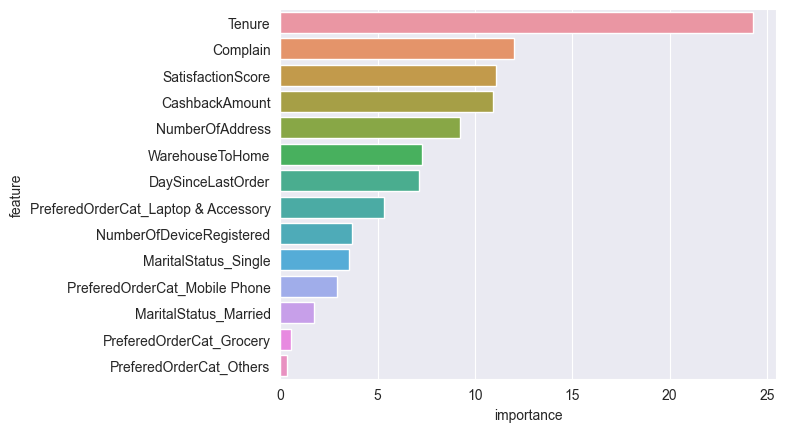

In [120]:
sns.barplot(data = feature_importance, x = "importance", y = "feature")

3 Features dengan nilai importance tertinggi atau memiliki pengaruh penting terhadap customer dalam melakukan churn atau tidak berdasarkan feature importance adalah:
- Tenure atau lamanya menjadi customer perusahan e-commerce kita membuat customer tidak rentan untuk churn
- Complain atau keluhan dalam satu bulan terakhir mempengaruhi customer churn jadi diharapkan untuk cepat untuk menanggapi complainan customer
- Satisfaction Score yang bernilai tinggi menentukan akan churn apa tidak. Jadi perlu di perhatikan satisfaction customer
- Cashback Amount yang tinggi juga akan menentukan churn atau tidak. dilihat dari plot EDA bahwa cashback yang tinggi menimbulkan rentannya customer untuk churn.

---

## **Save Final Model**

### Save with Pickle
Pickle adalah salah satu library yang bisa digunakan untuk menyimpan model Machine Learning yang sudah dibuat.

In [121]:
import pickle

# best model
cat_tuning = randomsearch_cat.best_estimator_
cat_tuning

# fit
cat_tuning.fit(X, y)

# save with pickle
pickle.dump(cat_tuning, open('finalmodel_CatBoost.sav', 'wb'))

---

## **Conclusion and Recommendation**

### Conclusion

Tujuan dari project ini adalah untuk mengetahui prediksi seorang customer apakah akan melakukan churn atau tidak menggunakan jasa perusahaan e-commerce ini lagi. Berdasarkan business problem di atas, diketahui bahwa:

- Model memiliki kemungkinan prediksi yang benar untuk pelanggan yang churn dan tidak churn `(TP+TN)/total) sebesar 86,03%`
- Model memiliki kemungkinan prediksi benar untuk pelanggan yang churn `(TP/(TP+FN)) sebesar 90%`
- Error Rate pada model ini sebesar `13.97%`

**Type 1 error**: False Positive 
- Action: Memberikan promosi dengan perkiraan cost sebesar `*$100* per capita per tahun`. ($1000 * 10% = $100 promo discount)
(referensi discount : https://www.cmswire.com/customer-experience/how-discounts-affect-customer-lifetime-value/)
- Konsekuensi: Memberikan promo pada target yang salah, sehingga perusahaan mengeluarkan biaya yang tidak tepat

 **Type 2 error**: False Negative
- Action: Tidak memberi perhatian pada customer ini yang kita prediksi tidak akan melakukan churn, dan dapat memberikan profit kepada perusahan dengan perkiraan cost `*$1000* per capita per tahun`.
(referensi : https://lp.littledata.io/average/revenue-per-customer) average revenue per customer $111
- Konsekuensi: Perusahaan mengalami kerugian karena kehilangan customer yang memberikan profit bagi perusahaan
<br>
<br>
- Cost FP : $ 100
- Cost FN : $ 1000


**TANPA MENGGUNAKAN MACHINE LEARNING**

Perusahaan e-commerce tidak dapat mengetahui customer yang akan melakukan churn, sehingga perusahaan e-commerce harus memberikan promosi ke semua customer, agar perusahaan tidak kehilangan customer. Ini menyebabkan perusahaan e-commerce harus mengeluarkan biaya yang besar dalam mengimplentasikan strategi promosinya. 

- Pengeluaran perusahaan untuk promosi `(TP+FP+TN+FN): $100 x 981 = $98,100`
- Promosi yang tepat sasaran pada orang yang churn `(TP+FN): $100 X 160 = $16,000`

Sehingga diketahui bahwa perusahaan e-commerce mengeluarkan biaya yang tidak tepat sasaran (biaya promosi untuk customer yang loyal) sebesar: `$98,100 - $16,000 = $82,100`. Biaya tersebut seharusnya dapat ditekan jika menggunakan Machine Learning.

**DENGAN MENGGUNAKAN MACHINE LEARNING**

Biaya yang tidak tepat sasaran di atas, dapat ditekan jika menggunakan Machine Learning, dengan memprediksi customer yang akan melakukan churn. Sehingga biaya promosi dapat difokuskan kepada customer yang akan melakukan churn, berdasarkan dari hasil prediksi dari Machine Learning.

- Pengeluaran perusahaan e-commerce karena salah promosi ke customer loyal `(FP): $100 x 121 = $12,100`
- Perusahaan e-commerce kehilangan customer karena tidak terprediksi akan churn `(FN): $1000 X 16 = $16,000`

Sehingga diketahui bahwa perusahaan e-commerce mengalami kerugian sebesar: `$12,100 + $16,000 = $24,100`

**KERUGIAN MENURUN SETELAH PAKAI MACHINE LEARNING**

- `Kerugian sebelum pakai Machine Learning: $82,100`
- `Kerugian setelah pakai Machine Learning: $24,100`

Dapat disimpulkan bahwa Machine Learning dengan menggunakan algoritma CatBoost setelah tuning dua kali berhasil menurunkan kerugian perusahaan sebesar `70.64%` --> (($82,100 - $24,100) / $82,100)


Machine Learning mampu mengatasi masalah yang ada pada perusahaan e-commerce ini, yaitu untuk melakukan prediksi pada customer yang akan melakukan churn. Algoritma machine learning yang digunakan pada model ini adalah CatBoost yang dilakukan tuning sebanyak dua kali, dengan nilai akurasi model sebesar `79% `menggunakan `F2 score`. Model ini mampu menurunkan kerugian perusahaan sebesar `70.64%`, dengan menekan angka false negative.

Berdasarkan explainable machine learning menggunakan feature importance, faktor-faktor yang mempengaruhi customer melakukan churn adalah Tenure (lama menjadi customer perusahaan), Complaint, Satisfaction Score, dan Cashback Amount.

### Recommendation

**For Business:**

Customer yang melakukan churn dapat menimbulkan kerugian bagi perusahaan. Oleh karena itu, perusahaan e-commerce perlu menyusun strategi agar dapat tetap menjaga kualitas produk dan pelayanan agar dapat menghindari complaint yang masuk. Selain itu, perusahaan e-commerce perlu menyusun strategi agar dapat menciptakan loyalitas pelanggan, baik dengan melakukan inovasi pada produk yang dipasarkan dan memberikan penawaran yang menarik, sehingga tenure customer semakin tinggi.

Serta melakukan survei untuk pengaplikasian diskon seperti referensi ini (https://www.cmswire.com/customer-experience/how-discounts-affect-customer-lifetime-value/) dimana memberikan medium discount lebih efektif membuat customer menjadi loyal daripada memberikan high discount. Dikarenakan berdasarkan hasil dari EDA dan Feature Importance, `Tenure` yang tinggi/lama akan membuat customer tersebut tidak churn.

Perusahaan perlu menggunakan machine learning yang sudah dibuat, agar dapat mengurangi kerugian bagi perusahaan dengan memberikan promosi tepat sasaran kepada customer yang akan melakukan churn.

**For Model:**

- Menambah jumlah feature supaya model bisa lebih belajar dengan baik contoh feature CustomerID untuk mengetahui bahwa data benar-benar duplikat atau bukan.
- Mencoba menambahkan kombinasi parameter lain dalam hyperparameter tuning.
- Perlu feature lain seperti lama pengiriman produk, ketepatan waktu pengiriman, order count untuk melihat berapa banyak barang yang di pesan, HourSpendOnApp untuk melihat berapa lama customer di dalam aplikasi kita, dan lain-lain.
- Mendorong customer untuk mengisi informasi dengan lengkap supaya tidak ada missing value.

### **Wish Me Luck Semoga Lulus :)**
